# EM Algorithm (https://towardsdatascience.com/implement-expectation-maximization-em-algorithm-in-python-from-scratch-f1278d1b9137)
Gaussian Mixture Model (GMM) and EM

In the example mentioned earlier, we have 2 clusters: people who like the product and people who don’t. If we know which cluster each customer belongs to (the labels), we can easily estimate the parameters(mean and variance) of the clusters, or if we know the parameters for both clusters, we can predict the labels. Unfortunately, we don’t know either one. To solve this chicken and egg problem, the Expectation-Maximization Algorithm (EM) comes in handy.
EM is an iterative algorithm to find the maximum likelihood when there are latent variables. The algorithm iterates between performing an expectation (E) step, which creates a heuristic of the posterior distribution and the log-likelihood using the current estimate for the parameters, and a maximization (M) step, which computes parameters by maximizing the expected log-likelihood from the E step. The parameter-estimates from M step are then used in the next E step. In the following sections, we will delve into the math behind EM, and implement it in Python from scratch.

Assumptions:
            - prior distribution is p(y) is binomial; p(x|y) in each cluster is gaussian
            
 $observed: x, latent: y$
 
 $prior: p(y, \pi) = \pi^{1(y=1)} (1-\pi)^{1(y=0)}$

$evidence: p(x|y = 0, \mu_{0}, \Sigma_{0}) = N(\mu_{0}, \Sigma_{0}) (likelihood)$

$p(x|y = 1, \mu_{1}, \Sigma_{1}) = N(\mu_{1}, \Sigma_{1}) (likelihood)$
           
           
$\theta := \pi, \mu_{0}, \mu_{1}, \Sigma_{0}, \Sigma_{1}$ 




At the expectation (E) step, we calculate the heuristics of the posteriors. We call them heuristics because they are calculated with guessed parameters $\theta$.

E step:

for each $i \in  \{1, ..., n\}: set$

$Q(y^{i} = 1 |x^{i}) := p(y^{i} = 1| x^{i}, \theta) $

$=\frac{p(x^{i}|y^{i} = 1, \theta) p(y^{i} = 1, \theta)}{\Sigma_{y^{i} \in (0,1)} p(x^{i}|y^{i}, \theta) p(y^{i}, \theta)}$


$Q(y^{i} = 0 |x^{i}) := p(y^{i} = 0| x^{i}, \theta)$

$=\frac{p(x^{i}|y^{i} = 0, \theta) p(y^{i} = 0, \theta)}{\Sigma_{y^{i} \in (0,1)} p(x^{i}|y^{i}, \theta) p(y^{i}, \theta)}$

At the maximization (M) step, we find the maximizers of the log-likelihood and use them to update θ. Notice that the summation inside the logarithm in equation (3) makes the computational complexity NP-hard. To move the summation out of the logarithm, we use Jensen’s inequality to find the evidence lower bound (ELBO) which is tight only when Q(y|x) = P(y|x). If you are interested in the math details from equation (3) to equation (5), this article has decent explanation.

M step:

$ \theta = argmax l(\theta)$

$ = argmax \: \Sigma_{i = 1...n} \: log \: p(x^{i}, \theta)$

$= argmax \: \Sigma_{i = 1...n} \: log \: \Sigma_{y^{i} \in (0,1)} \: p(x{i}, y{i}, \theta)$

(Using Jensens's inequality and ELBO)

$\geq argmax \: \Sigma_{i = 1...n} \: \Sigma_{y^{i} \in (0,1)} \: Q(y^{i}|x^{i}) \: log \: p(x^{i},y^{i}, \theta)$

$ = argmax \: \Sigma_{i = 1...n} E_{Q(y^{i}|x^{i})} \: log \: p(x^{i}|y^{i}, \theta) \: p(y^{i}, \theta)$


### Marginal distribution

A marginal probability ca always be written as an expected value:

$p_{X} (x) = \Sigma_{y} \: p_{X|Y} \: (x|y) \: p_{Y} (y) = \: E_{Y} \: [p_{X|Y} \: (x|y)]$

Intuitively, the marginal probability of X is computed by examining the conditional probability of X given a particular value of Y, and then averaging this conditional probability over the distribution of all values of Y.

This follows from the definition of expected value (after applying the law of the unconscious statistician)

$E_{Y}[f(Y)] = \Sigma_{y} \: f(y) p_{Y}(y)$

See the last to rows above: We sum over all values of y (x is fixed) and take the product of the probability of (y|x) times a function of (y|x), which is log p((y|x)) p(x)..

Luckily, there are closed-form solutions for the maximizers in GMM.

$\pi =\frac{\Sigma_{i=1...n} Q(y^{i} = 1|x^{i})}{n}$

$ \mu_{0} = \frac{\Sigma_{i=1...n} x^{i} \: Q(y^{i} = 0|x^{i})}{\Sigma_{i=1...n} \: Q(y^{i} = 0|x^{i})}$

$ \mu_{1} = \frac{\Sigma_{i=1...n} x^{i} \: Q(y^{i} = 1|x^{i})}{\Sigma_{i=1...n} \: Q(y^{i} = 1|x^{i})}$

$\Sigma_{0} = \frac{\Sigma_{i=1...n} \: Q(y^{i} = 0|x^{i}) \: (x^{i} - \mu_{0}) \: (x^{i} -\mu_{0})^{T}}{\Sigma_{i=1...n} \: Q(y^{i} = 0|x^{i})}$

$\Sigma_{1} = \frac{\Sigma_{i=1...n} \: Q(y^{i} = 1|x^{i}) \: (x^{i} - \mu_{1}) \: (x^{i} -\mu_{1})^{T}}{\Sigma_{i=1...n} \: Q(y^{i} = 1|x^{i})}$
 



We use these updated parameters in the next iteration of E step, get the new heuristics and run M-step. What the EM algorithm does is repeat these two steps until the average log-likelihood converges.
Before jumping into the code, let’s compare the above parameter solutions from EM to the direct parameter estimates when the labels are known. Did you find they are very similar? In fact, the only difference is that the EM solutions use the heuristics of posteriors Q while the direct estimates use the true labels.

$\pi'=\frac{\Sigma_{i=1...n} 1(y^{i} = 1)}{n}$

$ \mu_{0}' = \frac{\Sigma_{i=1...n} x^{i} \: 1(y^{i} = 0)}{\Sigma_{i=1...n} \: 1(y^{i} = 0)}$

$ \mu_{1}' = \frac{\Sigma_{i=1...n} x^{i} \: 1(y^{i} = 1)}{\Sigma_{i=1...n} \: 1(y^{i} = 1)}$

$\Sigma_{0}' = \frac{\Sigma_{i=1...n} \: 1(y^{i} = 0) \: (x^{i} - \mu_{0}) \: (x^{i} -\mu_{0})^{T}}{\Sigma_{i=1...n} \: 1(y^{i} = 0)}$

$\Sigma_{1}' = \frac{\Sigma_{i=1...n} \: 1(y^{i} = 1) \: (x^{i} - \mu_{1}) \: (x^{i} -\mu_{1})^{T}}{\Sigma_{i=1...n} \: 1(y^{i} = 1)}$

# Iris dataset

It includes three iris species with 50 samples each as well as some properties of each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

In [1]:
import pandas as pd

df = pd.read_csv(r'iris.csv')

In [12]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
X = df.iloc[:,0:4]

In [8]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
df[df["species"] == "setosa"]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Experimenting with scikit learn examples

In [27]:
setosa_sepal = df.loc[df["species"] == 'setosa', ['sepal_length','sepal_width']]
versicolor_sepal = df.loc[df["species"] == 'versicolor', ['sepal_length','sepal_width']]
virginica_sepal = df.loc[df["species"] == 'virginica', ['sepal_length','sepal_width']]

setosa_petal = df.loc[df["species"] == 'setosa', ['petal_length','petal_width']]
versicolor_petal = df.loc[df["species"] == 'versicolor', ['petal_length','petal_width']]
virginica_petal = df.loc[df["species"] == 'virginica', ['petal_length','petal_width']]



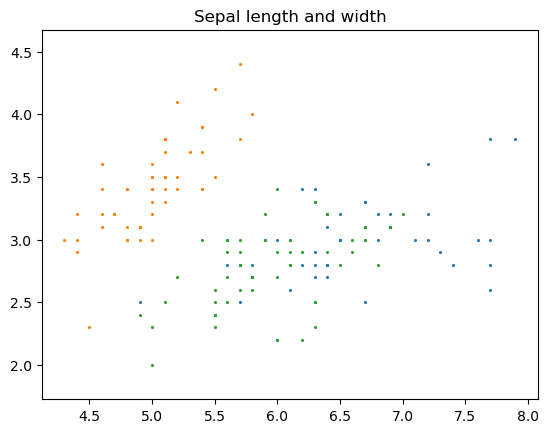

In [30]:
import matplotlib.pyplot as plt

plt.scatter(virginica_sepal.iloc[:, 0], virginica_sepal.iloc[:, 1], s=1.5)
plt.scatter(setosa_sepal.iloc[:, 0], setosa_sepal.iloc[:, 1], s=1.5)
plt.scatter(versicolor_sepal.iloc[:, 0], versicolor_sepal.iloc[:, 1], s=1.5)

plt.title("Sepal length and width")
plt.axis("equal")
plt.show()

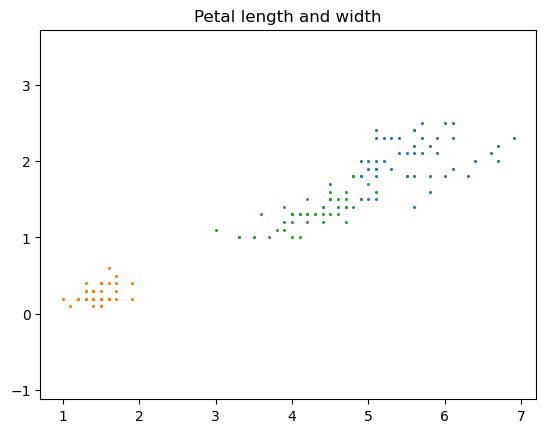

In [29]:
plt.scatter(virginica_petal.iloc[:, 0], virginica_petal.iloc[:, 1], s=1.5)
plt.scatter(setosa_petal.iloc[:, 0], setosa_petal.iloc[:, 1], s=1.5)
plt.scatter(versicolor_petal.iloc[:, 0], versicolor_petal.iloc[:, 1], s=1.5)

plt.title("Petal length and width")
plt.axis("equal")
plt.show()

## Model training and selection

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py

We vary the number of components from 1 to 6 and the type of covariance parameters to use:

"full": each component has its own general covariance matrix.
"tied": all components share the same general covariance matrix.
"diag": each component has its own diagonal covariance matrix.
"spherical": each component has its own single variance.
We score the different models and keep the best model (the lowest BIC). This is done by using GridSearchCV and a user-defined score function which returns the negative BIC score, as GridSearchCV is designed to maximize a score (maximizing the negative BIC is equivalent to minimizing the BIC).

The best set of parameters and estimator are stored in best_parameters_ and best_estimator_, respectively.

In [31]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x177aeba30>)

In [44]:
Y_ = grid_search.predict(X)

In [46]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
X.loc[Y_ == 1, ["sepal_length", "sepal_width"]]

,sepal_length,sepal_width
50,7.0,3.2
51,6.4,3.2
52,6.9,3.1
53,5.5,2.3
54,6.5,2.8
55,5.7,2.8
56,6.3,3.3
57,4.9,2.4
58,6.6,2.9
59,5.2,2.7


In [37]:
grid_search.cv_results_

{'mean_fit_time': array([0.0053431 , 0.00367613, 0.00339632, 0.00308728, 0.00328765,
        0.00322623, 0.00335479, 0.00373755, 0.00619564, 0.00508904,
        0.00425129, 0.00576816, 0.00372887, 0.00284896, 0.00375829,
        0.00344162, 0.0037684 , 0.00360746, 0.00273509, 0.00510216,
        0.00527816, 0.00480618, 0.00580521, 0.00688782]),
 'std_fit_time': array([3.89157866e-03, 1.37289475e-04, 2.43827891e-04, 9.37573901e-05,
        2.84116593e-04, 2.59501046e-04, 9.20334862e-04, 9.80009825e-04,
        2.14986458e-03, 1.26987447e-03, 6.77462730e-04, 1.68339382e-03,
        1.43561919e-03, 2.12071985e-04, 1.36522196e-03, 3.09031000e-04,
        7.89212508e-04, 2.92769527e-04, 1.50090538e-04, 3.82872332e-03,
        1.17862931e-03, 6.54570306e-04, 1.12022230e-03, 2.04580699e-03]),
 'mean_score_time': array([0.00046859, 0.000528  , 0.00039444, 0.00037055, 0.00035   ,
        0.00034976, 0.0004632 , 0.00049667, 0.00054011, 0.00042691,
        0.00037842, 0.00036383, 0.00065312, 0.00

## Plot the BIC scores

To ease the plotting we can create a pandas.DataFrame from the results of the cross-validation done by the grid search. We re-inverse the sign of the BIC score to show the effect of minimizing it.

In [32]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
8,3,tied,232.828797
19,2,full,234.280247
7,2,tied,235.486937
18,1,full,239.992080
6,1,tied,239.992080


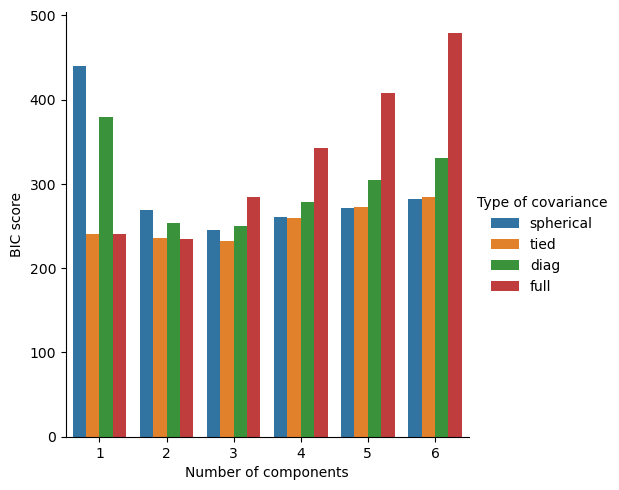

In [33]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

## Plot the best model

We plot an ellipse to show each Gaussian component of the selected model. For such purpose, one needs to find the eigenvalues of the covariance matrices as returned by the covariances_ attribute. The shape of such matrices depends on the covariance_type:

"full": (n_components, n_features, n_features)
"tied": (n_features, n_features)
"diag": (n_components, n_features)
"spherical": (n_components,)


In [34]:
color_iter = sns.color_palette("tab10", 2)[::-1]

In [35]:
color_iter

[(1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

In [36]:
grid_search.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
from sklearn.datasets import make_spd_matrix

cov = make_spd_matrix(3)

In [40]:
from scipy import linalg

v, w = linalg.eigh(cov)

In [41]:
w

array([[ 0.52303257,  0.46997286,  0.71102914],
       [-0.77447307, -0.08623569,  0.62670157],
       [-0.35584882,  0.87845826, -0.31887725]])

In [42]:
v

array([0.29181894, 0.84823037, 3.63464113])

In [51]:
grid_search.best_estimator_.covariances_

array([[0.26331128, 0.08810577, 0.17293141, 0.03755214],
       [0.08810577, 0.11099874, 0.04860125, 0.02790009],
       [0.17293141, 0.04860125, 0.20230653, 0.0433163 ],
       [0.03755214, 0.02790009, 0.0433163 , 0.03645316]])

In [52]:
grid_search.best_estimator_.means_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.95673069, 2.75723311, 4.30879602, 1.33001138],
       [6.59243799, 2.99622913, 5.55244194, 2.05051451]])

In [70]:
grid_search.best_estimator_.means_[:,2:4]

array([[1.464     , 0.244     ],
       [4.30879602, 1.33001138],
       [5.55244194, 2.05051451]])

In [54]:
for i in grid_search.best_estimator_.means_:
    print(i)

[5.006 3.418 1.464 0.244]
[5.95673069 2.75723311 4.30879602 1.33001138]
[6.59243799 2.99622913 5.55244194 2.05051451]


In [55]:
for i in grid_search.best_estimator_.covariances_:
    print(i)

[0.26331128 0.08810577 0.17293141 0.03755214]
[0.08810577 0.11099874 0.04860125 0.02790009]
[0.17293141 0.04860125 0.20230653 0.0433163 ]
[0.03755214 0.02790009 0.0433163  0.03645316]


In [57]:
np.array([grid_search.best_estimator_.covariances_, grid_search.best_estimator_.covariances_, grid_search.best_estimator_.covariances_])

array([[[0.26331128, 0.08810577, 0.17293141, 0.03755214],
        [0.08810577, 0.11099874, 0.04860125, 0.02790009],
        [0.17293141, 0.04860125, 0.20230653, 0.0433163 ],
        [0.03755214, 0.02790009, 0.0433163 , 0.03645316]],

       [[0.26331128, 0.08810577, 0.17293141, 0.03755214],
        [0.08810577, 0.11099874, 0.04860125, 0.02790009],
        [0.17293141, 0.04860125, 0.20230653, 0.0433163 ],
        [0.03755214, 0.02790009, 0.0433163 , 0.03645316]],

       [[0.26331128, 0.08810577, 0.17293141, 0.03755214],
        [0.08810577, 0.11099874, 0.04860125, 0.02790009],
        [0.17293141, 0.04860125, 0.20230653, 0.0433163 ],
        [0.03755214, 0.02790009, 0.0433163 , 0.03645316]]])

In [86]:
grid_search.best_estimator_.covariances_[0:2, 0:2]

array([[0.26331128, 0.08810577],
       [0.08810577, 0.11099874]])

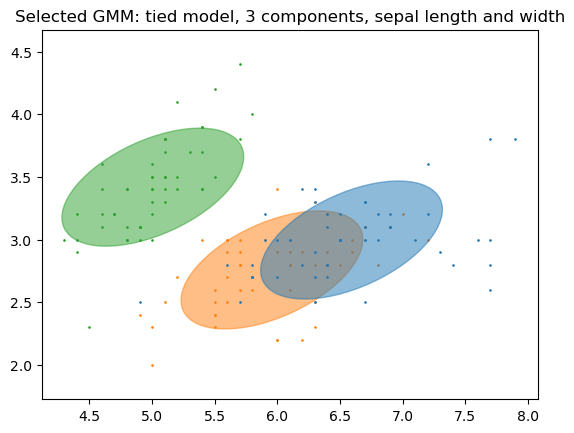

In [92]:
from matplotlib.patches import Ellipse
from scipy import linalg

X_petal = X[["petal_length", "petal_width"]]
X_sepal = X[["sepal_length", "sepal_width"]]

color_iter = sns.color_palette("tab10", 3)[::-1]
Y_ = grid_search.predict(X)

fig, ax = plt.subplots()

covariances = np.array([grid_search.best_estimator_.covariances_[0:2, 0:2], grid_search.best_estimator_.covariances_[0:2, 0:2], 
          grid_search.best_estimator_.covariances_[0:2, 0:2]]) # since our best solution has the same COV for every class
# Im only using a 2x2 COV for the first two coordinates ([0:2, 0:2])

for i, (mean, cov, color) in enumerate(
    zip(
        grid_search.best_estimator_.means_,
        covariances,
        color_iter,
    )
):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_sepal.iloc[Y_ == i, 0], X_sepal.iloc[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean[0:2], v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    f"Selected GMM: {grid_search.best_params_['covariance_type']} model, "
    f"{grid_search.best_params_['n_components']} components, sepal length and width"
)
plt.axis("equal")
plt.show()

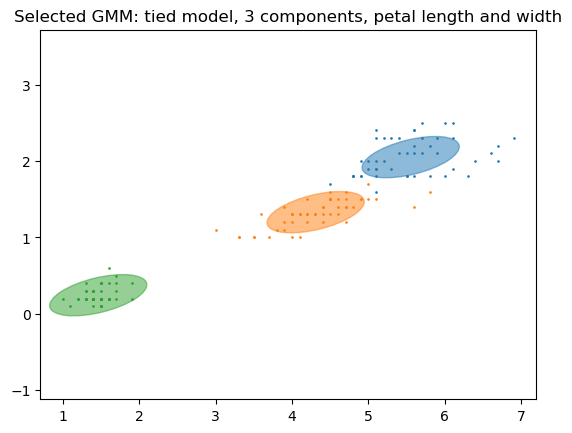

In [94]:
from matplotlib.patches import Ellipse
from scipy import linalg

X_petal = X[["petal_length", "petal_width"]]
X_sepal = X[["sepal_length", "sepal_width"]]

color_iter = sns.color_palette("tab10", 3)[::-1]
Y_ = grid_search.predict(X)

fig, ax = plt.subplots()

covariances = np.array([grid_search.best_estimator_.covariances_[2:4, 2:4], grid_search.best_estimator_.covariances_[2:4, 2:4], 
          grid_search.best_estimator_.covariances_[2:4, 2:4]]) # since our best solution has the same COV for every class
# eigenvector, eigenvalues are calculated with a reduced covariance matrix of the petal variables


for i, (mean, cov, color) in enumerate(
    zip(
        grid_search.best_estimator_.means_,  # here Im taking the mean coordinates of the petal coordinates, which are stored in the 2nd and 3rd column 
        covariances,
        color_iter,
    )
):
    v, w = linalg.eigh(cov)    
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_petal.iloc[Y_ == i, 0], X_petal.iloc[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])  #
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean[2:4], v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    f"Selected GMM: {grid_search.best_params_['covariance_type']} model, "
    f"{grid_search.best_params_['n_components']} components, petal length and width"
)
plt.axis("equal")
plt.show()

## GMM with covariance type "full" (each Gaussian has its own COV)

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=0, covariance_type='full',
                            tol=0.01,
                            max_iter=1000).fit(X)

# Scatter plot of petal variables with Gaussian ellipses

[[[0.029505   0.005584  ]
  [0.005584   0.011265  ]]

 [[0.26908974 0.02183174]
  [0.02183174 0.07113079]]

 [[0.27571466 0.11210194]
  [0.11210194 0.06669587]]]


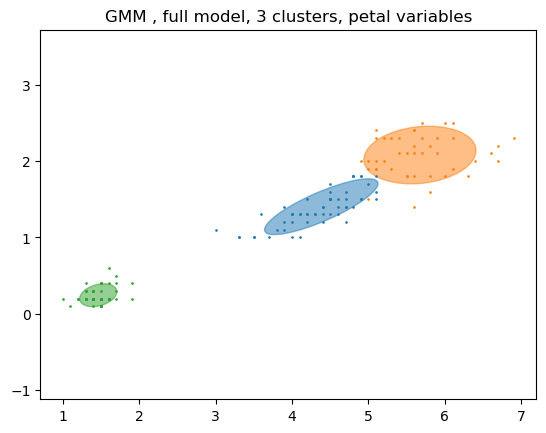

In [102]:
from matplotlib.patches import Ellipse
from scipy import linalg

X_petal = X[["petal_length", "petal_width"]]
X_sepal = X[["sepal_length", "sepal_width"]]

color_iter = sns.color_palette("tab10", 3)[::-1]
Y_ = gm.predict(X)

fig, ax = plt.subplots()

covariances = np.array([gm.covariances_[0][2:4,2:4], gm.covariances_[1][2:4,2:4], gm.covariances_[2][2:4,2:4]])
print(covariances)

for i, (mean, cov, color) in enumerate(
    zip(
        gm.means_,  # here Im taking the mean coordinates of the petal coordinates, which are stored in the 2nd and 3rd column 
        covariances, # reduced COV for the coordinates 3 and 4 to calculate the eigenvectors
        color_iter,
    )
):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_petal.iloc[Y_ == i, 0], X_petal.iloc[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean[2:4], v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    "GMM , full model, 3 clusters, petal variables"
)
plt.axis("equal")
plt.show()